In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
inspector=inspect(engine)

In [16]:
columns_meas = inspector.get_columns('measurement')
for column in columns_meas:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c4279abd30>,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

In [11]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c4243811c0>,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [25]:
# Find the most recent date in the data set.
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest[0]

'2017-08-23'

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [52]:
# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > year_ago).order_by(Measurement.date).all()
last_year_prcp

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [55]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_last_year_prcp = pd.DataFrame(last_year_prcp)
df_last_year_prcp.rename(columns={0: "date",1: "prcp"},inplace=True)

df_last_year_prcp
df_last_year_prcp.set_index('date', inplace=True)
df_last_year_prcp

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [60]:
# Sort the dataframe by date
df_last_year_prcp.sort_values("date",inplace=True)
df_last_year_prcp.fillna(0,inplace=True)
df_last_year_prcp

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


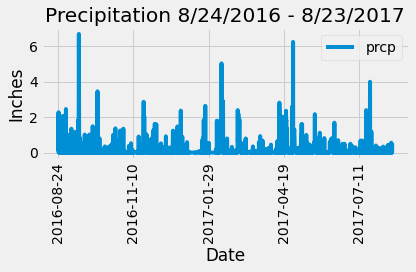

In [89]:
df_last_year_prcp.plot.line(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation 8/24/2016 - 8/23/2017")
plt.tight_layout()
plt.show()

In [90]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_last_year_prcp.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [122]:
# Design a query to calculate the total number stations in the dataset
station_count2 = session.query(Measurement.station).count()
station_count2

19550

In [123]:
sel = [Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs,Station.name]
same_station = session.query(*sel).filter(Measurement.station == Station.station).count()
same_station

19550

In [125]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_group_count_test = session.query(Measurement.station,Station.name,func.count(Measurement.station)).filter(Measurement.station == Station.station).group_by(Station.name).order_by(func.count(Measurement.station).desc()).all()
station_group_count_test

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [138]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# lowest temp

print(f"The lowest temperature at Waihee in the most recent 12 months was {waihee_low_temp[0][0]}.")

The lowest temperature at Waihee in the most recent 12 months was 59.0.


In [139]:
# highest temp
waihee_high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == Station.station).filter(Measurement.station == "USC00519281").\
filter(Measurement.date > year_ago).order_by(Measurement.date).all()
print(f"The highest temperature at Waihee in the most recent 12 months was {waihee_high_temp[0][0]}.")

The highest temperature at Waihee in the most recent 12 months was 83.0.


In [140]:
# average temp
waihee_avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == Station.station).filter(Measurement.station == "USC00519281").\
filter(Measurement.date > year_ago).order_by(Measurement.date).all()
print(f"The average temperature at Waihee in the most recent 12 months was {round(waihee_avg_temp[0][0],1)}.")

The average temperature at Waihee in the most recent 12 months was 73.1.


In [143]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waihee_temp_recent = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == Station.station).filter(Measurement.station == "USC00519281").\
filter(Measurement.date > year_ago).order_by(Measurement.date).all()
waihee_temp_recent

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [149]:
df_waihee_temp_recent = pd.DataFrame(waihee_temp_recent)
df_waihee_temp_recent.rename(columns={0: "date",1: "temp"},inplace=True)
df_waihee_temp_recent.set_index('date', inplace=True)
df_waihee_temp_recent

,temp
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


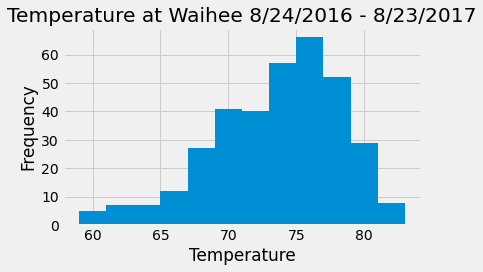

In [155]:
df_waihee_temp_recent.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature at Waihee 8/24/2016 - 8/23/2017")
plt.tight_layout()
plt.show()

# Close session

In [156]:
# Close Session
session.close()